# **INCOME SPENT CLUSTERING Using Hierarchial Clustering**

**Importing dependencies**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

**---- INITIAL DATA ANALYSIS & PRE PROCESSING ----**

In [59]:
dataset = pd.read_csv('dataset.csv') #reading the dataset

In [60]:
dataset.head() #gives 1st 5 rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [61]:
dataset.tail() #gives last 5 rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [62]:
dataset.shape #dimensions of the dataset

(200, 5)

In [63]:
dataset.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual Income (k$)  200 non-null    int64 
 4   Spending Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [64]:
dataset.describe() #statistical info about the dataset

,CustomerID,Age,Annual Income (k$),Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Dropping the useless columns**

In [65]:
new_df = dataset.drop(columns='CustomerID', axis=1) #droppping custonmerID column

**analysis of above operation**

In [66]:
new_df.head()

,Gender,Age,Annual Income (k$),Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**LABEL ENCODING**

**Encoding the 'Gender' feature**

In [67]:
label_encoder = LabelEncoder()
new_df['Gender'] = label_encoder.fit_transform(new_df['Gender']) #Encoded Gender column

**analysis of the above operation**

In [68]:
new_df.head()

,Gender,Age,Annual Income (k$),Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [69]:
new_df.describe()

,Gender,Age,Annual Income (k$),Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [70]:
new_df['Gender'].value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

**VISUALIZING THE DATA USING DENDROGRAM**

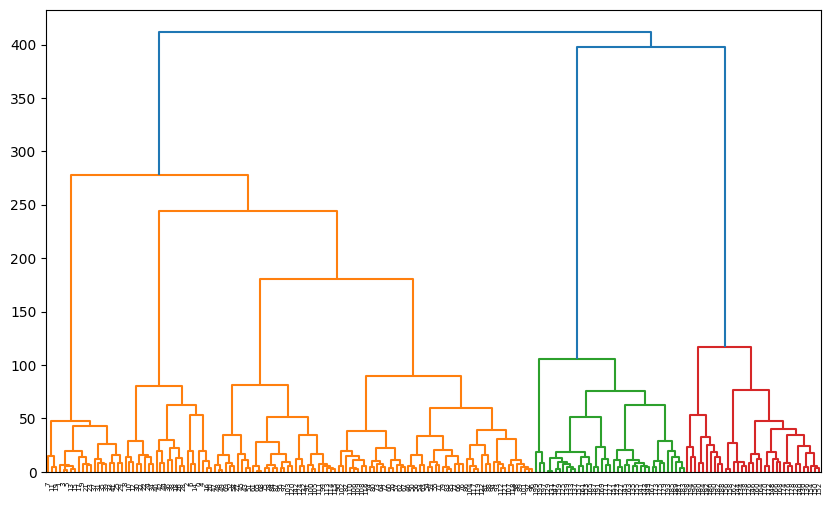

In [71]:
plt.figure(figsize=(10,6))
dendogram = dendrogram(linkage(new_df, method='ward')) #dendrogram
plt.show()

**Initializing the model and Finding Centroids**

In [72]:
model = AgglomerativeClustering(n_clusters=5, linkage='average')
labels = model.fit_predict(new_df) #Finding centroids
print(labels)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 1 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


**VISUALIZATION OF CLUSTERS**

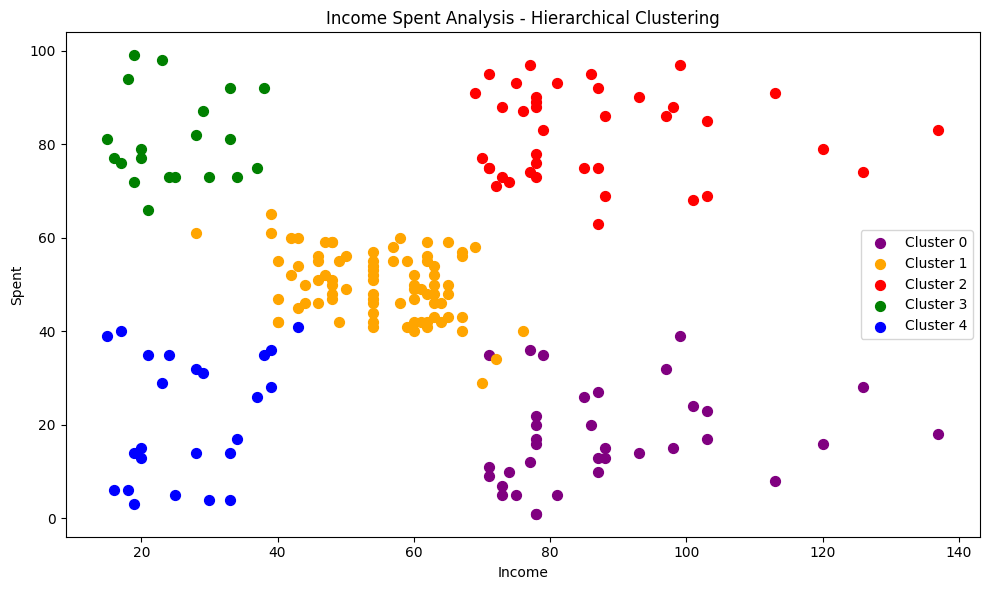

In [ ]:
X = dataset.iloc[:, [3,4]].values #income and spend feature values

plt.figure(figsize=(10,6))

#Assigning centroid for each datapoint and plotting them
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, c='purple', label ='Cluster 0') 
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, c='orange', label ='Cluster 1')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, c='red', label ='Cluster 2')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, c='green', label ='Cluster 3')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, c='blue', label ='Cluster 4')

plt.title('Income Spent Analysis - Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.tight_layout()
plt.show()

**---- MODEL EVALUATION ----**

In [74]:
model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X)

sil_score = silhouette_score(X, labels)
db_score = davies_bouldin_score(X, labels)
ch_score = calinski_harabasz_score(X, labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")
print(f"Calinski-Harabasz Index: {ch_score:.3f}")


Silhouette Score: 0.462
Davies-Bouldin Index: 0.707
Calinski-Harabasz Index: 143.820


# **Thank You!**